<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/7_1_LinearRegression(DeepLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

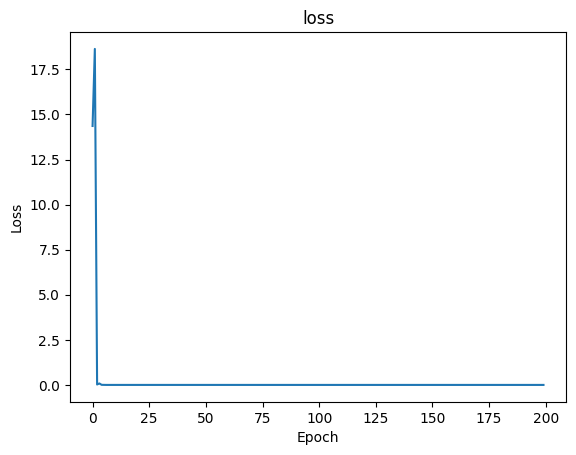

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


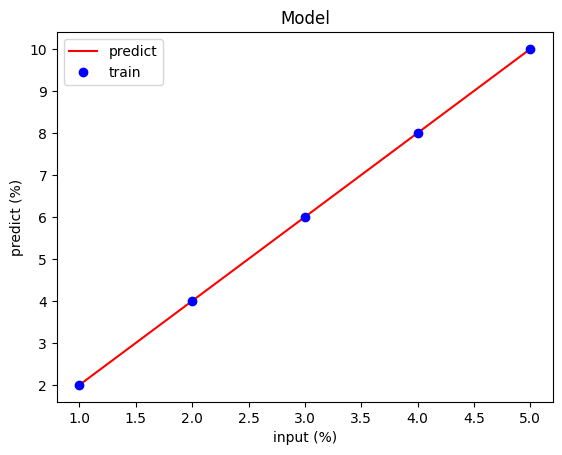

5/5 - 0s - 28ms/step - loss: 0.0000e+00
loss :  0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
input : 1, output : [[2.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
input : 2, output : [[4.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
input : 3, output : [[6.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
input : 4, output : [[8.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
input : 5, output : [[10.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
input : 6, output : [[12.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
input : 7, output : [[14.000001]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
input : 99, output : [[198.00002]]


In [1]:
# 단순한 선형 회귀 예제 (텐서플로우2)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# x(입력), y(결과) 데이터
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 4, 6, 8, 10])

"""
케라스(Keras)는 다양한 유형의 신경망 모델을 지원합니다. 주요 모델 종류는 다음과 같습니다:
1. 순차 모델 (Sequential Model): 가장 간단한 형태로, 층이 순차적으로 쌓인 구조입니다.
   각 층은 이전 층의 출력을 입력으로 사용합니다. 주로 선형 스택 구조의 모델에 사용됩니다.

2. 함수형 API (Functional API): 복잡한 구조의 모델을 구성할 수 있도록 해주는 API로,
여러 입력 및 출력, 층 간의 공유 등을 지원합니다. 이로 인해 다중 입력과 출력, 비선형 연결 등이 가능합니다.

3. 서브클래싱 (Subclassing): 사용자 정의 모델을 생성할 수 있는 방법으로,
tf.keras.Model을 상속하여 복잡한 구조의 모델을 정의할 수 있습니다.
이는 매우 유연하지만, 코드 작성이 복잡할 수 있습니다.
"""
# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1, activation='linear'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1))

# 모델 구조 확인
model.summary()

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# cost/loss funcion
# loss를 mean_squared_error 방식을 사용한다는 의미로 mse 라고 써도 인식한다.
model.compile(loss='mean_squared_error', optimizer=sgd)

# verbose = "auto", 0, 1 또는 2, 0 = 무음, 1 = 진행률 표시줄, 2 = 한 줄.
# "auto"대부분의 경우 기본값은 1

hist = model.fit(x_train, y_train, batch_size=1, epochs=200, verbose=0)

#print(hist.history['loss'])
#print(hist.history['acc'])
#print(hist.history['val_loss'])
#print(hist.history['val_acc'])
#loss : 훈련 손실값
#acc : 훈련 정확도
#val_loss : 검증 손실값
#val_acc : 검증 정확도


# 훈련 과정 시각화 (손실)
plt.plot(hist.history['loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 모델 시각화
line_x = np.arange(min(x_train), max(x_train), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x_train, y_train, 'bo')
plt.title('Model')
plt.xlabel('input (%)')
plt.ylabel('predict (%)')
plt.legend(['predict', 'train'], loc='upper left')
plt.show()

# 손실 함수 계산
loss = model.evaluate(x_train, y_train, batch_size=1, verbose=2)
print('loss : ', loss)


# 모델 테스트
for i in range(1, 8):
    print('input : ', i, ', output : ', model.predict(np.array([i])), sep='')  # 입력 i에 대한 예측 값 출력

print('input : ', 99, ', output : ', model.predict(np.array([99])), sep='')
